In [43]:
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#### Data updated daily 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [14]:
df = pd.read_csv('../data/time_series_19-covid-Confirmed.csv')

In [15]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
columns = ['Province/State', 'Lat', 'Long']
df.drop(columns, axis=1, inplace=True)

In [17]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,47,48,50,50,50,53,59,70,75,82
1,Japan,2,1,2,2,4,4,7,7,11,...,360,420,461,502,511,581,639,639,701,773
2,Singapore,0,1,3,3,4,5,7,7,10,...,117,130,138,150,150,160,178,178,200,212
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Saint Lucia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,Suriname,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,US,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
selected_countries = ['Poland', 'Germany', 'Italy']
poland_and_neighbours = df[df['Country/Region'].isin(selected_countries)]

In [19]:
poland_and_neighbours

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
11,Germany,0,0,0,0,0,1,4,4,4,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
16,Italy,0,0,0,0,0,0,0,0,0,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
74,Poland,0,0,0,0,0,0,0,0,0,...,1,5,5,11,16,22,31,49,68,103


### Removing columns containing zeros
- `germany_non_zero` - removed all columns that contain all zeros
- `poland_non_zero` - removed all columns that containt any zero 

In [20]:
germany_non_zero = poland_and_neighbours.loc[:, (poland_and_neighbours != 0).any()]
poland_non_zero = poland_and_neighbours.loc[:, (poland_and_neighbours != 0).all()]

In [21]:
germany_non_zero

,Country/Region,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
11,Germany,1,4,4,4,5,8,10,12,12,...,482,670,799,1040,1176,1457,1908,2078,3675,4585
16,Italy,0,0,0,0,2,2,2,2,2,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
74,Poland,0,0,0,0,0,0,0,0,0,...,1,5,5,11,16,22,31,49,68,103


In [22]:
poland_non_zero

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
11,Germany,262,482,670,799,1040,1176,1457,1908,2078,3675,4585
16,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157
74,Poland,1,1,5,5,11,16,22,31,49,68,103


### Selecting only Poland row and leaving only the dates columns for plotting.

In [34]:
poland = germany_non_zero[germany_non_zero['Country/Region'] == 'Poland']
poland = poland.loc[:, poland.columns != 'Country/Region']
poland

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
74,0,0,0,0,0,0,0,0,0,0,...,1,5,5,11,16,22,31,49,68,103


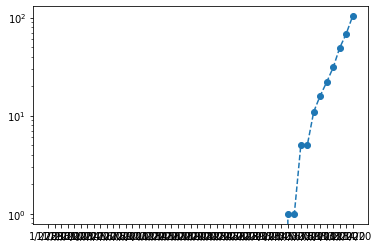

In [37]:
plt.plot(poland.columns, poland.iloc[0, :], linestyle='dashed', marker='o')
plt.yscale("log")
plt.show()

### Similarly selecting the data for Germany and Italy

In [38]:
italy = germany_non_zero[germany_non_zero['Country/Region'] == 'Italy']
italy = italy.loc[:, italy.columns != 'Country/Region']
italy

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
16,0,0,0,0,2,2,2,2,2,2,...,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157


In [39]:
germany = germany_non_zero[germany_non_zero['Country/Region'] == 'Germany']
germany = germany.loc[:, germany.columns != 'Country/Region']
germany

,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
11,1,4,4,4,5,8,10,12,12,12,...,482,670,799,1040,1176,1457,1908,2078,3675,4585


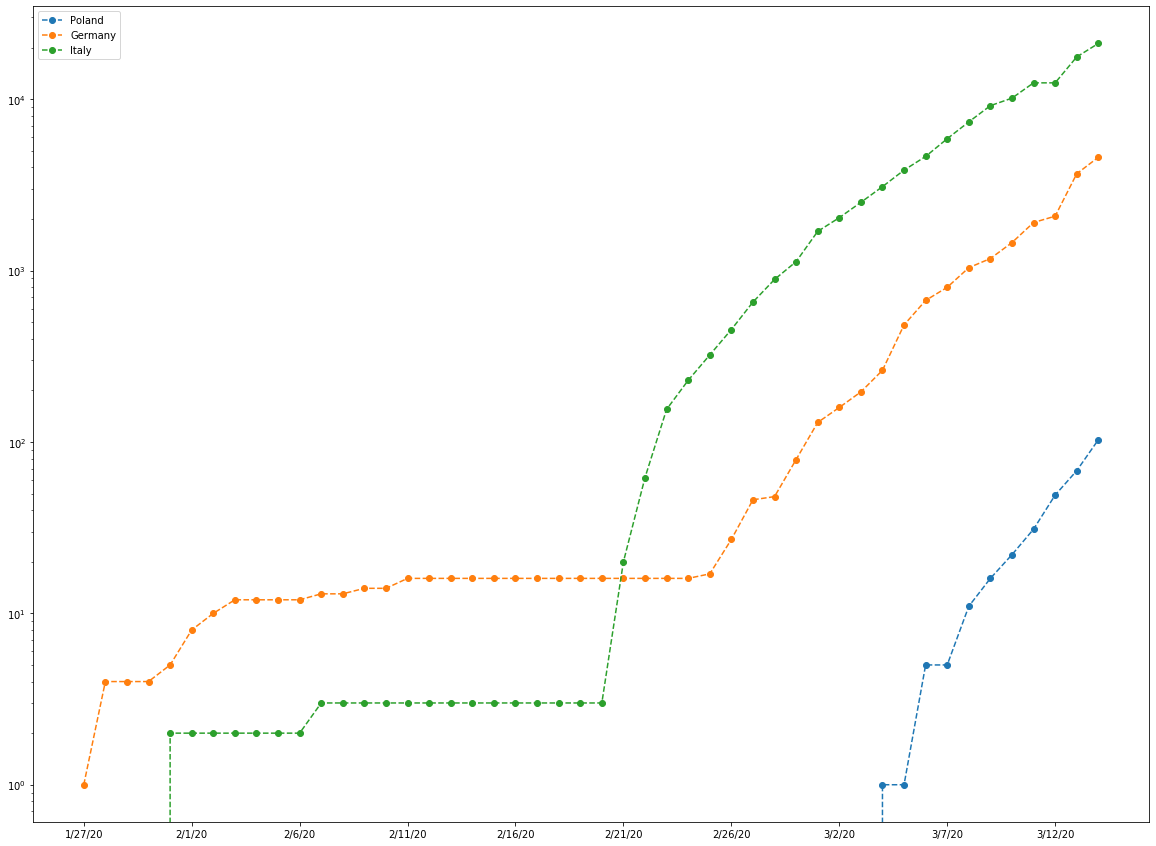

In [61]:
tick_spacing = 5

fig, ax = plt.subplots(figsize=(20, 15))
ax.plot(poland.columns, poland.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(germany.columns, germany.iloc[0, :], linestyle='dashed', marker='o')
ax.plot(italy.columns, italy.iloc[0, :], linestyle='dashed', marker='o')

plt.yscale('log')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(['Poland', 'Germany', 'Italy'])

plt.show()